In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as pl
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"advertising.csv", encoding='latin-1')

In [3]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
df.dropna()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


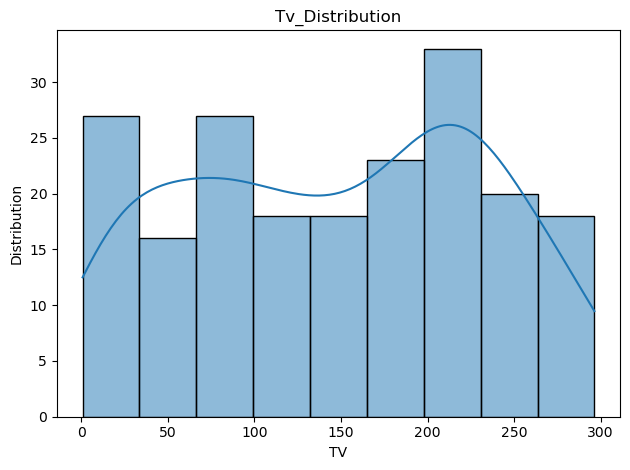

In [11]:
sns.histplot(data= df,x="TV",kde = True)
plt.xlabel("TV")
plt.ylabel("Distribution")
plt.title("Tv_Distribution")
plt.tight_layout()
plt.show()

<Axes: xlabel='Radio', ylabel='Count'>

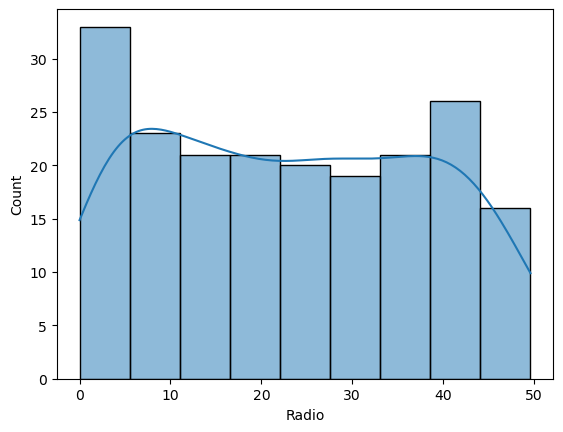

In [18]:
sns.histplot(df["Radio"],kde=True)

<Axes: xlabel='Newspaper', ylabel='Count'>

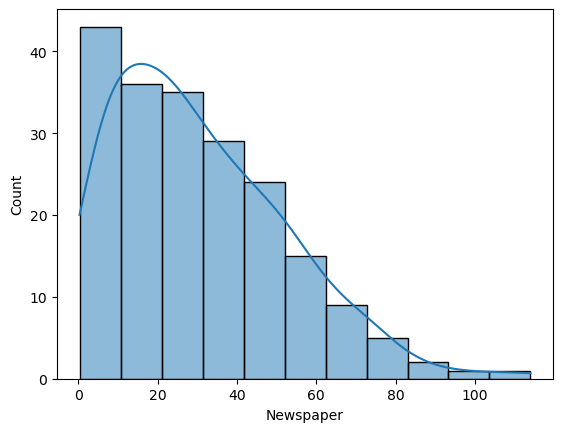

In [19]:
sns.histplot(df["Newspaper"],kde=True)

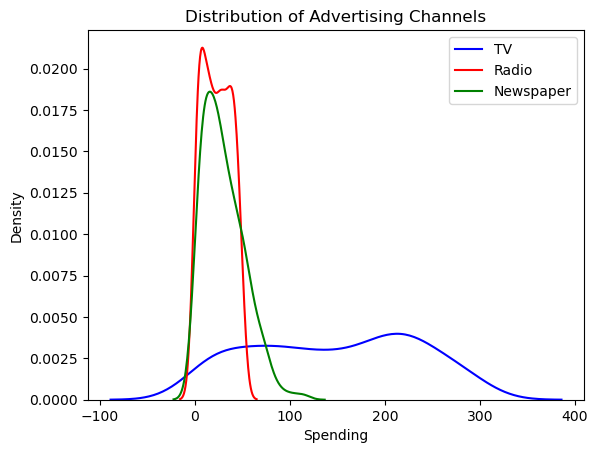

In [12]:
plt.subplot(1, 1, 1)
sns.kdeplot(df['TV'], label='TV', color='blue')
sns.kdeplot(df['Radio'], label='Radio', color='red')
sns.kdeplot(df['Newspaper'], label='Newspaper', color='green')
plt.title('Distribution of Advertising Channels')
plt.xlabel('Spending')
plt.ylabel('Density')
plt.legend()
plt.show()

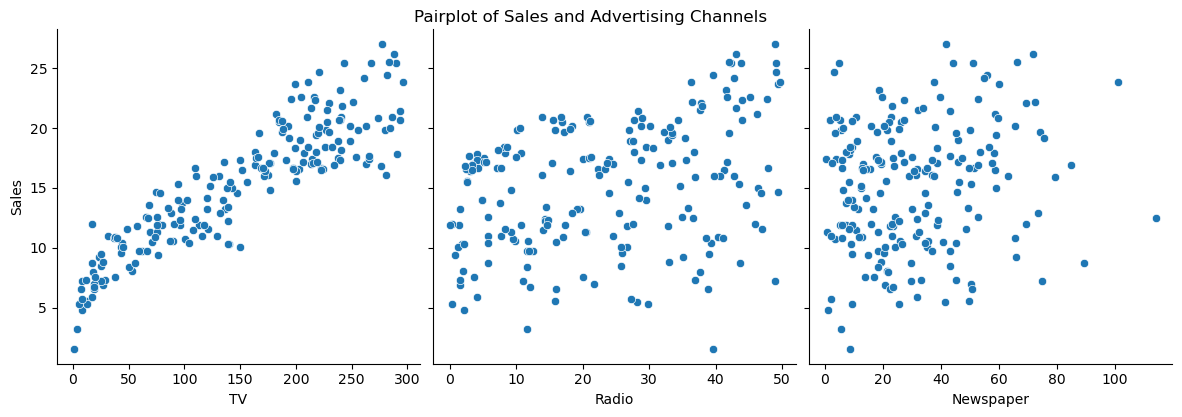

In [13]:
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.suptitle('Pairplot of Sales and Advertising Channels', y=1.02)
plt.show()

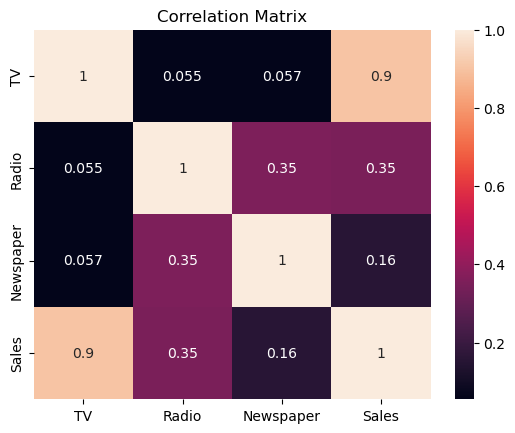

In [14]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

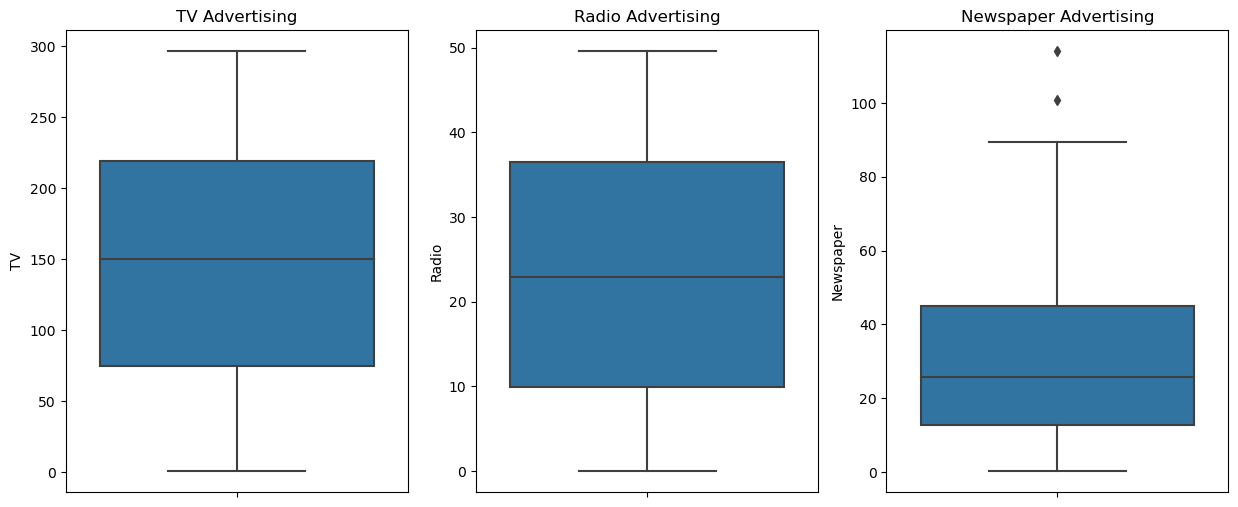

In [16]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
sns.boxplot(y='TV', data=df)
plt.title('TV Advertising')

plt.subplot(1, 3, 2)
sns.boxplot(y='Radio', data=df)
plt.title('Radio Advertising')

plt.subplot(1, 3, 3)
sns.boxplot(y='Newspaper', data=df)
plt.title('Newspaper Advertising')

plt.show()

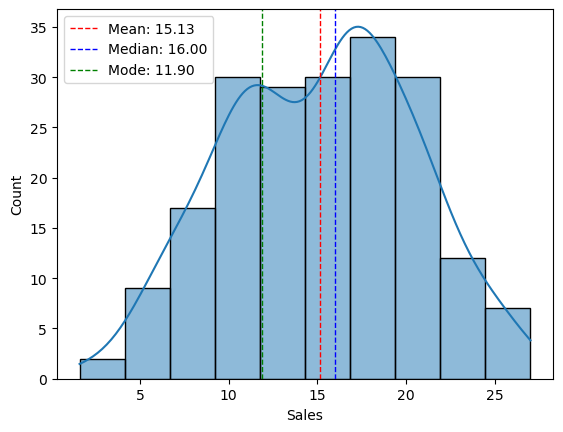

In [20]:
import statistics
sns.histplot(data = df, x= "Sales",kde=True)
# Calculate the mean and median
mean_value = df["Sales"].mean()
median_value = df["Sales"].median()
mode_value = statistics.mode(df["Sales"])

# Add annotations to the plot
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=1, label=f'Median: {median_value:.2f}')
plt.axvline(mode_value, color='green', linestyle='dashed', linewidth=1, label=f'Mode: {mode_value:.2f}')

# Add a legend
plt.legend()

plt.show()

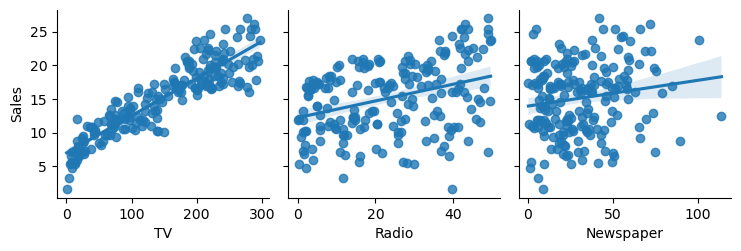

In [21]:
sns.pairplot(data = df, x_vars =["TV","Radio","Newspaper"], y_vars = "Sales", kind= "reg")

In [23]:
X = df.drop("Sales",axis=1)
Y = df["Sales"]

print(X.shape,Y.shape)

(200, 3) (200,)


In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LinearRegression
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state=42)

In [26]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(160, 3) (40, 3) (160,) (40,)


In [28]:
model_lr = LinearRegression()
model_lr.fit(X_train,Y_train)

LinearRegression()

In [29]:
train_preds = model_lr.predict(X_train)
test_preds = model_lr.predict(X_test)

In [30]:

residual_train = Y_train - train_preds
residual_train

79    -0.914658
197   -0.528814
38     0.189067
24     0.238674
122   -0.634124
         ...   
106   -0.116056
14    -0.360057
92    -0.818326
179    2.773360
102   -1.299976
Name: Sales, Length: 160, dtype: float64

In [31]:
residual_test = Y_test - test_preds
residual_test

95    -0.134772
15     1.990260
30    -2.323989
158   -1.972785
128    3.017281
115    0.030598
69     1.218805
170   -0.290350
174   -0.737013
45    -0.566575
66     2.076035
182    0.218266
165   -1.307512
78    -2.767507
186   -2.345510
177    1.768372
56    -2.628146
152   -1.298766
82     0.291194
68    -1.578328
124   -1.106318
16    -0.098833
148   -0.005183
93    -0.188548
65     1.882039
60     0.174933
84     0.860915
67    -0.415209
125   -0.170809
132   -2.226825
9     -0.359474
18     0.665091
55     2.897080
75    -1.734342
150   -5.478475
104   -0.483645
135   -0.528218
137   -2.009533
164   -0.709928
76     0.435587
Name: Sales, dtype: float64

C:\Users\Anusha Bhat\AppData\Local\Temp\ipykernel_34076\1419661736.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual_train, bins=15,kde=True)


<Axes: xlabel='Sales', ylabel='Density'>

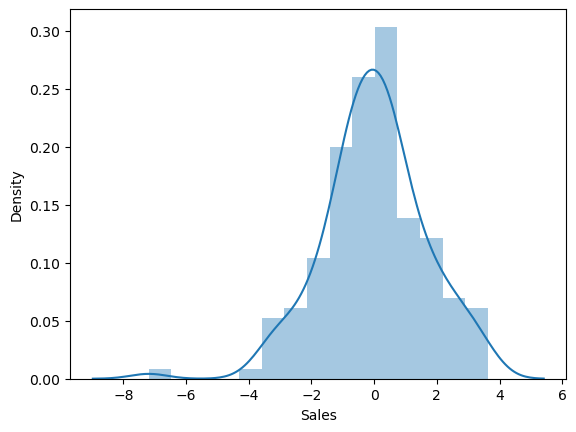

In [32]:
sns.distplot(residual_train, bins=15,kde=True)

<Axes: xlabel='Sales', ylabel='Count'>

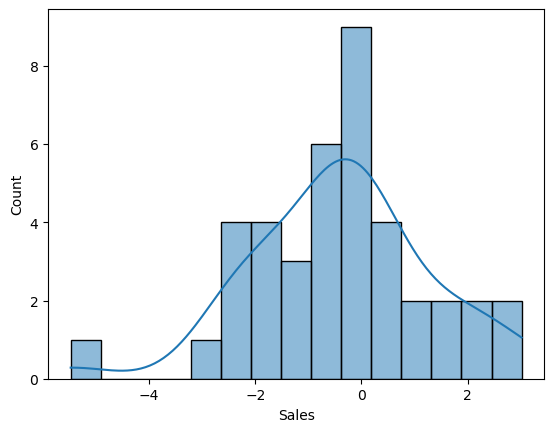

In [33]:
sns.histplot(residual_test, bins = 15, edgecolor="k",kde=True)

In [36]:

from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

R_squared_train = r2_score(Y_train,train_preds)
print(R_squared_train)

R_squared_test = r2_score(Y_test,test_preds)
print(R_squared_test)

0.9001416005862131
0.9059011844150826


In [37]:
MSE_train = mean_squared_error(Y_train,train_preds)
print(MSE_train)

MSE_test = mean_squared_error(Y_test,test_preds)
print(MSE_test)

2.676142653782668
2.9077569102710923


In [38]:
import math
rmse_train = np.sqrt(mean_squared_error(Y_train,train_preds))
print(rmse_train)
rmse_test = np.sqrt(mean_squared_error(Y_test,test_preds))
print(rmse_test)

1.6358920055378559
1.7052146229349232


In [39]:
mae_train = mean_absolute_error(Y_train,train_preds)
print(mae_train)

mae_test = mean_absolute_error(Y_test,test_preds)
print(mae_test)

1.2344160869575866
1.2748262109549344


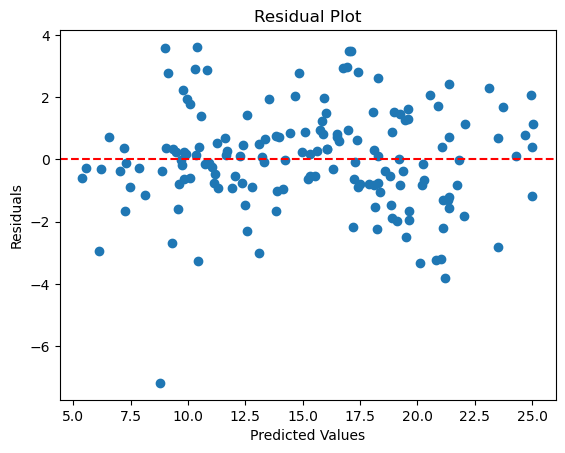

In [41]:

# Residual plot analysis (visualization, not numerical)

plt.scatter(train_preds, residual_train)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

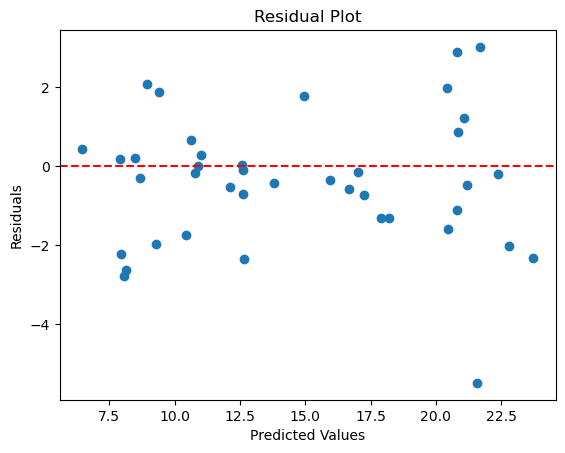

In [42]:
plt.scatter(test_preds, residual_test)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

In [47]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [51]:
xgboost_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgboost_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [52]:
y_pred_linear = linear_model.predict(X_test)
print('Linear Regression - Mean Squared Error:', mean_squared_error(y_test, y_pred_linear))
print('Linear Regression - Mean Absolute Error:', mean_absolute_error(y_test, y_pred_linear))
print('Linear Regression - R2 Score:', r2_score(y_test, y_pred_linear))

Linear Regression - Mean Squared Error: 2.9077569102710923
Linear Regression - Mean Absolute Error: 1.2748262109549344
Linear Regression - R2 Score: 0.9059011844150826


In [53]:
y_pred_rf = rf_model.predict(X_test)
print('Random Forest - Mean Squared Error:', mean_squared_error(y_test, y_pred_rf))
print('Random Forest - Mean Absolute Error:', mean_absolute_error(y_test, y_pred_rf))
print('Random Forest - R2 Score:', r2_score(y_test, y_pred_rf))

Random Forest - Mean Squared Error: 1.4517645250000026
Random Forest - Mean Absolute Error: 0.9066749999999999
Random Forest - R2 Score: 0.9530190017507466


In [54]:
y_pred_xgboost = xgboost_model.predict(X_test)
print('XGBoost - Mean Squared Error:', mean_squared_error(y_test, y_pred_xgboost))
print('XGBoost - Mean Absolute Error:', mean_absolute_error(y_test, y_pred_xgboost))
print('XGBoost - R2 Score:', r2_score(y_test, y_pred_xgboost))

XGBoost - Mean Squared Error: 1.4514290545159532
XGBoost - Mean Absolute Error: 0.889899742603302
XGBoost - R2 Score: 0.953029858014247


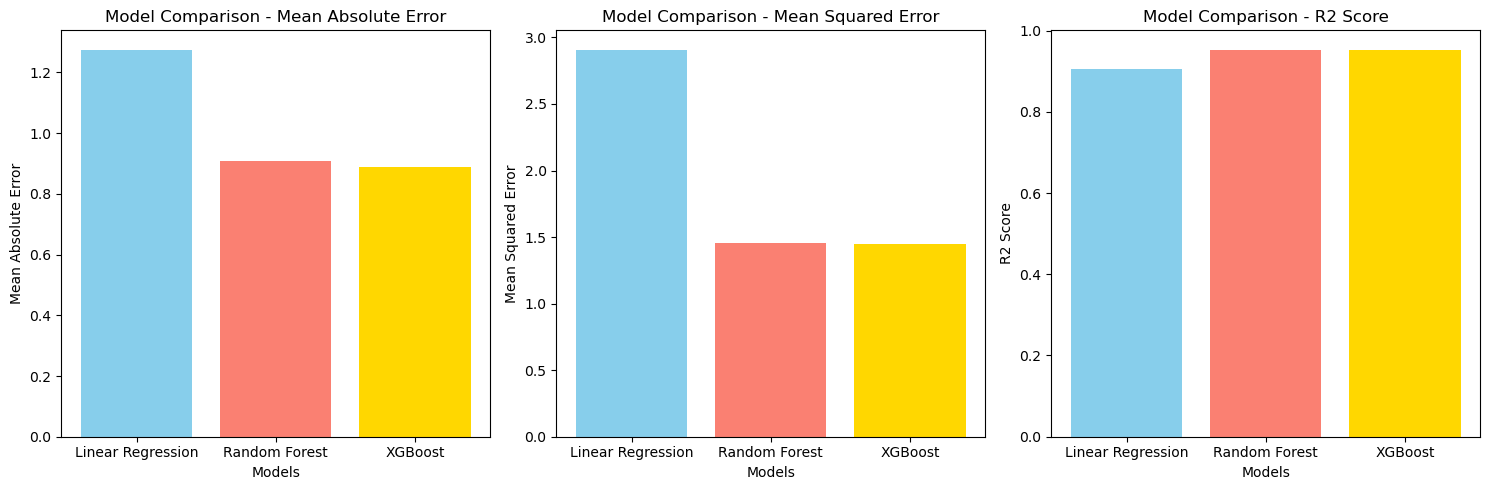

In [55]:
# Calculate Mean Absolute Error for each model
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mae_xgboost = mean_absolute_error(y_test, y_pred_xgboost)

# Calculate Mean Squared Error for each model
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_xgboost = mean_squared_error(y_test, y_pred_xgboost)

# Calculate R2 Score for each model
r2_linear = r2_score(y_test, y_pred_linear)
r2_rf = r2_score(y_test, y_pred_rf)
r2_xgboost = r2_score(y_test, y_pred_xgboost)

# Create a bar plot for Model Comparison
models = ['Linear Regression', 'Random Forest', 'XGBoost']
mae_values = [mae_linear, mae_rf, mae_xgboost]
mse_values = [mse_linear, mse_rf, mse_xgboost]
r2_values = [r2_linear, r2_rf, r2_xgboost]

# Plotting Mean Absolute Error
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.bar(models, mae_values, color=['skyblue', 'salmon', 'gold'])
plt.title('Model Comparison - Mean Absolute Error')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error')

# Plotting Mean Squared Error
plt.subplot(1, 3, 2)
plt.bar(models, mse_values, color=['skyblue', 'salmon', 'gold'])
plt.title('Model Comparison - Mean Squared Error')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')

# Plotting R2 Score
plt.subplot(1, 3, 3)
plt.bar(models, r2_values, color=['skyblue', 'salmon', 'gold'])
plt.title('Model Comparison - R2 Score')
plt.xlabel('Models')
plt.ylabel('R2 Score')

plt.tight_layout()
plt.show()

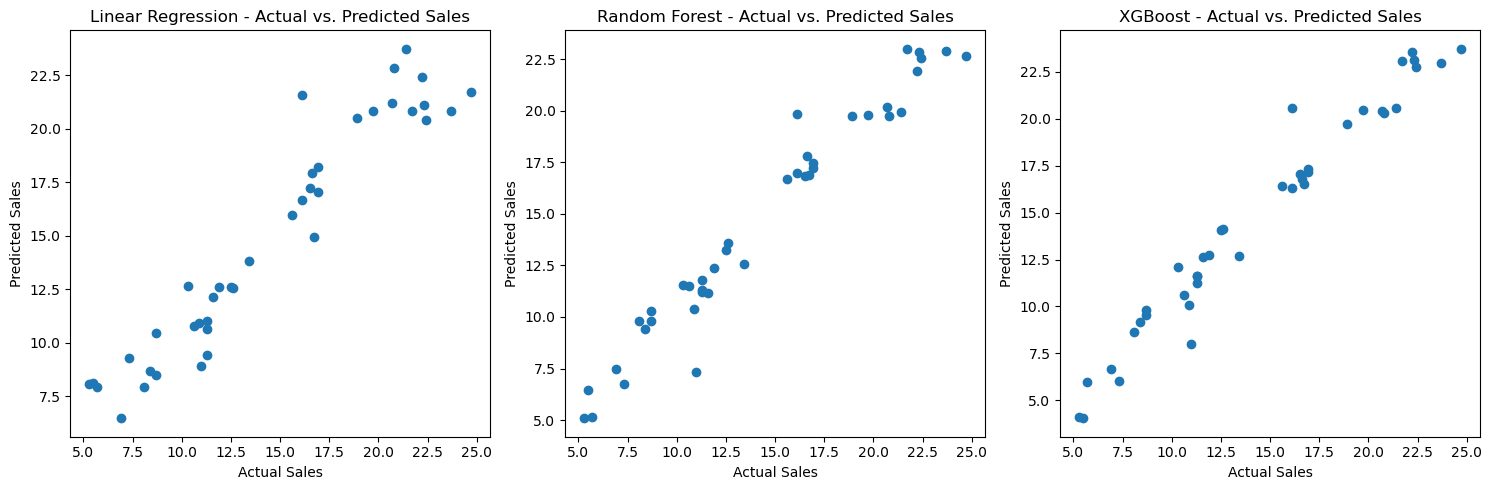

In [56]:
plt.figure(figsize=(15, 5))

# Linear Regression
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_linear)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Linear Regression - Actual vs. Predicted Sales")

# Random Forest Regressor
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Random Forest - Actual vs. Predicted Sales")

# XGBoost Regressor
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_xgboost)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("XGBoost - Actual vs. Predicted Sales")

plt.tight_layout()
plt.show()

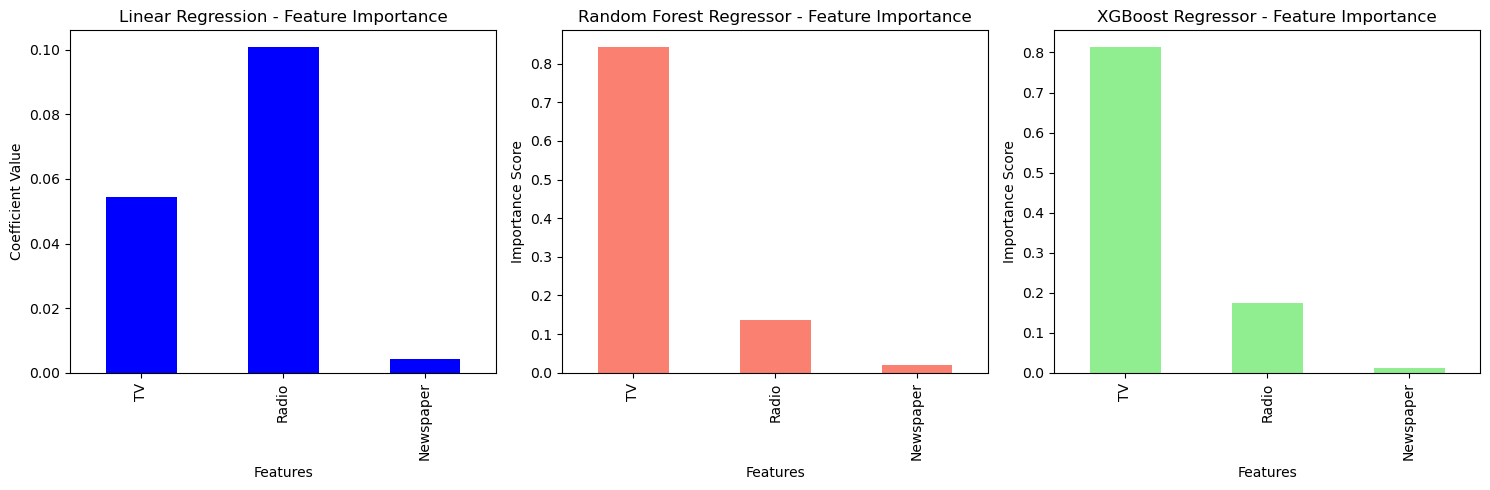

In [57]:
# Feature Importance for Linear Regression (Coefficients)
linear_coef = pd.Series(linear_model.coef_, index=X.columns)

# Feature Importance for Random Forest Regressor
feature_importance_rf = pd.Series(rf_model.feature_importances_, index=X.columns)

# Feature Importance for XGBoost Regressor
feature_importance_xgboost = pd.Series(xgboost_model.feature_importances_, index=X.columns)

# Plotting side by side
plt.figure(figsize=(15, 5))

# Linear Regression
plt.subplot(1, 3, 1)
linear_coef.plot(kind='bar', color='blue')
plt.title('Linear Regression - Feature Importance')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')

# Random Forest Regressor
plt.subplot(1, 3, 2)
feature_importance_rf.sort_values(ascending=False).plot(kind='bar', color='salmon')
plt.title('Random Forest Regressor - Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance Score')

# XGBoost Regressor
plt.subplot(1, 3, 3)
feature_importance_xgboost.sort_values(ascending=False).plot(kind='bar', color='lightgreen')
plt.title('XGBoost Regressor - Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance Score')

plt.tight_layout()
plt.show()